The goal of this notebook is to format the data in a compact notebook and perform statistical analysis

In [1]:
import os 
import copy
import scipy
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import fxsdata
from fxsdata import fxs_mouse

In [2]:
%matplotlib notebook
#%matplotlib inline

In [3]:
num_queries = 4 
query_names = ['Synapsin, PSD95', 'Synapsin, VGluT1, PSD95', 'Synapsin, VGluT2, PSD95', 'Synapsin, VGluT1, VGluT2, PSD95']
region_names = ['F000', 'F001', 'F002', 'F003']
layer_names = ['Layer1', 'Layer2', 'Layer3', 'Layer4']
z_spans = [1, 2, 3]
style_name = 'seaborn-whitegrid'
xticklabels = ['2ss v 3ss', '4ss v 6ss', '5ss v 7ss', '2ss (second) v 1ss']
plot_titles = query_names
row_labels = ['Q0', 'Q1', 'Q2', 'Q3']

## Load excitatory synapse data into fxs_mouse objects 

In [4]:
list_of_mice = []
mice_dict = {} 

name = '2ss'
fn = '/Users/anish/Documents/yi_mice/excel/2ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_2ss = fxs_mouse(name)
mouse_2ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_2ss)
mice_dict[name] = mouse_2ss

name = '3ss'
fn = '/Users/anish/Documents/yi_mice/excel/3ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'KO'
mouse_3ss = fxs_mouse(name)
mouse_3ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_3ss)
mice_dict[name] = mouse_3ss


name = '4ss'
fn = '/Users/anish/Documents/yi_mice/excel/4ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_4ss = fxs_mouse(name)
mouse_4ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_4ss)
mice_dict[name] = mouse_4ss


name = '5ss'
fn = '/Users/anish/Documents/yi_mice/excel/5ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_5ss = fxs_mouse(name)
mouse_5ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_5ss)
mice_dict[name] = mouse_5ss


name = '6ss'
fn = '/Users/anish/Documents/yi_mice/excel/6ss_fragX.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
mouse_6ss = fxs_mouse(name)
mouse_6ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_6ss)
mice_dict[name] = mouse_6ss


name = '7ss'
fn = '/Users/anish/Documents/yi_mice/excel/7ss_fragX.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
mouse_7ss = fxs_mouse(name)
mouse_7ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_7ss)
mice_dict[name] = mouse_7ss


name = '1ss'
fn = '/Users/anish/Documents/yi_mice/excel/1ss_fragX.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
mouse_1ss = fxs_mouse(name)
mouse_1ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_1ss)
mice_dict[name] = mouse_1ss


name = '22ss'
fn = '/Users/anish/Documents/yi_mice/excel/22ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_22ss = fxs_mouse(name)
mouse_22ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_22ss)
mice_dict[name] = mouse_22ss


36 48
24 36
12 24
0 12
36 48
24 36
12 24
0 12
36 48
24 36
12 24
0 12
36 48
24 36
12 24
0 12
0 12
12 24
24 36
36 48
0 12
12 24
24 36
36 48
0 12
12 24
24 36
36 48
36 48
24 36
12 24
0 12


In [5]:
fn = '/Users/anish/Documents/yi_mice/excel/vglut2/2ss_fragX_vglut2.xlsx'
mouse_2ss = fxsdata.update_vglut2_queries(mouse_2ss, fn, layer_order = 'backward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/3ss_fragX_vglut2.xlsx'
mouse_3ss = fxsdata.update_vglut2_queries(mouse_3ss, fn, layer_order = 'backward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/4ss_fragX_vglut2.xlsx'
mouse_4ss = fxsdata.update_vglut2_queries(mouse_4ss, fn, layer_order = 'backward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/6ss_fragX_vglut2.xlsx'
mouse_6ss = fxsdata.update_vglut2_queries(mouse_6ss, fn, layer_order = 'forward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/5ss_fragX_vglut2.xlsx'
mouse_5ss = fxsdata.update_vglut2_queries(mouse_5ss, fn, layer_order = 'backward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/7ss_fragX_vglut2.xlsx'
mouse_7ss = fxsdata.update_vglut2_queries(mouse_7ss, fn, layer_order = 'forward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/22ss_fragX_vglut2.xlsx'
mouse_22ss = fxsdata.update_vglut2_queries(mouse_22ss, fn, layer_order = 'backward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/1ss_fragX_vglut2.xlsx'
mouse_1ss = fxsdata.update_vglut2_queries(mouse_1ss, fn, layer_order = 'forward')

## Load inhibitory synapse data

In [6]:
num_queries_in_fn = 1
qlist = ['q4']

fn = '/Users/anish/Documents/yi_mice/excel/2ss_inhibitory_fragX.xlsx'
layer_order = 'backward'
mouse_2ss = fxsdata.add_query_to_mouse(mouse_2ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/3ss_inhibitory_fragX.xlsx'
layer_order = 'backward'
mouse_3ss = fxsdata.add_query_to_mouse(mouse_3ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/4ss_inhibitory_fragX.xlsx'
layer_order = 'backward'
mouse_4ss = fxsdata.add_query_to_mouse(mouse_4ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/5ss_inhibitory_fragX.xlsx'
layer_order = 'backward'
mouse_5ss = fxsdata.add_query_to_mouse(mouse_5ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/6ss_inhibitory_fragX.xlsx'
layer_order = 'forward'
mouse_6ss = fxsdata.add_query_to_mouse(mouse_6ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/7ss_inhibitory_fragX.xlsx'
layer_order = 'forward'
mouse_7ss = fxsdata.add_query_to_mouse(mouse_7ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/1ss_inhibitory_fragX.xlsx'
layer_order = 'forward'
mouse_1ss = fxsdata.add_query_to_mouse(mouse_1ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/22ss_inhibitory_fragX.xlsx'
layer_order = 'backward'
mouse_22ss = fxsdata.add_query_to_mouse(mouse_22ss, fn, num_queries_in_fn, qlist, layer_order)

In [7]:
# Add small synapses (1slice-2slice to the calculations)
mouse_2ss = fxsdata.compute_small_synapses(mouse_2ss)
mouse_3ss = fxsdata.compute_small_synapses(mouse_3ss)
mouse_4ss = fxsdata.compute_small_synapses(mouse_4ss)
mouse_5ss = fxsdata.compute_small_synapses(mouse_5ss)
mouse_6ss = fxsdata.compute_small_synapses(mouse_6ss)
mouse_7ss = fxsdata.compute_small_synapses(mouse_7ss)
mouse_1ss = fxsdata.compute_small_synapses(mouse_1ss)
mouse_22ss = fxsdata.compute_small_synapses(mouse_22ss)


In [8]:
# Add medium synapses (2slice-3slice to the calculations)
mouse_2ss = fxsdata.compute_medium_synapses(mouse_2ss)
mouse_3ss = fxsdata.compute_medium_synapses(mouse_3ss)
mouse_4ss = fxsdata.compute_medium_synapses(mouse_4ss)
mouse_5ss = fxsdata.compute_medium_synapses(mouse_5ss)
mouse_6ss = fxsdata.compute_medium_synapses(mouse_6ss)
mouse_7ss = fxsdata.compute_medium_synapses(mouse_7ss)
mouse_1ss = fxsdata.compute_medium_synapses(mouse_1ss)
mouse_22ss = fxsdata.compute_medium_synapses(mouse_22ss)


In [9]:
mouse_2ss.region_data[0].all_queries.keys()

dict_keys(['q3', 'q2', 'q1', 'q4', 'q0'])

In [10]:
# Combine multiple mice into an average mouse for each type

In [11]:
row_labels = ['Q0', 'Q1', 'Q2', 'Q3', 'Q4'] 

In [12]:
wt_mouse_list = [mouse_2ss, mouse_4ss, mouse_5ss, mouse_22ss]
mouse_name = 'wildtype'
wt_mouse = fxsdata.average_mice(wt_mouse_list, mouse_name, row_labels)

In [13]:
ko_mouse_list = [mouse_3ss, mouse_6ss, mouse_7ss, mouse_1ss]
mouse_name = 'knockout'
ko_mouse = fxsdata.average_mice(ko_mouse_list, mouse_name, row_labels)

### AVERAGE LAYERS

In [14]:
query_list = ['Q0', 'Q1', 'Q2', 'Q3', 'Q4']

# Average Layers

# Add small synapses (1slice-2slice to the calculations)
avg_layer_mouse_2ss = fxsdata.average_mouse_layers(mouse_2ss, query_list)
avg_layer_mouse_3ss = fxsdata.average_mouse_layers(mouse_3ss, query_list)
avg_layer_mouse_4ss = fxsdata.average_mouse_layers(mouse_4ss, query_list)
avg_layer_mouse_5ss = fxsdata.average_mouse_layers(mouse_5ss, query_list)
avg_layer_mouse_6ss = fxsdata.average_mouse_layers(mouse_6ss, query_list)
avg_layer_mouse_7ss = fxsdata.average_mouse_layers(mouse_7ss, query_list)
avg_layer_mouse_1ss = fxsdata.average_mouse_layers(mouse_1ss, query_list)
avg_layer_mouse_22ss = fxsdata.average_mouse_layers(mouse_22ss, query_list)

avg_layer_wt_mouse_list = [avg_layer_mouse_2ss, avg_layer_mouse_4ss, avg_layer_mouse_5ss, avg_layer_mouse_22ss]
mouse_name = 'wildtype'
avg_layer_wt_mouse = fxsdata.average_layer_mice(avg_layer_wt_mouse_list, mouse_name, query_list)

avg_layer_ko_mouse_list = [avg_layer_mouse_3ss, avg_layer_mouse_6ss, avg_layer_mouse_7ss, avg_layer_mouse_1ss]
mouse_name = 'knockout'
avg_layer_ko_mouse = fxsdata.average_layer_mice(avg_layer_ko_mouse_list, mouse_name, query_list)

pairkey = 'unpaired'
layer_avg_pval_dict = fxsdata.create_layer_avg_pval_dict(avg_layer_ko_mouse_list, avg_layer_wt_mouse_list, query_list, pairkey)



## All layer averaged bar plots

In [15]:
xlabels = ['Glutamatergic', 'Glutamatergic VGluT1','Glutamatergic VGluT2', 'Glutamatergic VGluT1/VGluT2', 'GABAergic']
query_keys = ['Q0', 'Q1', 'Q2', 'Q3', 'Q4']
xlabels = ['Glut.', 'Glut. \n VGluT1','Glut. \n VGluT2', 'Glut. \n VGluT1/VGluT2', 'GABAergic']

#xlabels= query_keys

In [16]:
layer_key_list = ['average', 'average_L1', 'average_L23', 'average_L4']
layer_fn_list = ['all', 'L1', 'L23', 'L4']
size_fn_list = ['z0', 'z2', 'z3']
size_key_list = ['0', '2', '3']
size_title_list = ['Small', 'Medium', 'Large']
layer_title_list = ['All Layers', 'Layer 1', 'Layer 2/3', 'Layer 4']

<IPython.core.display.Javascript object>


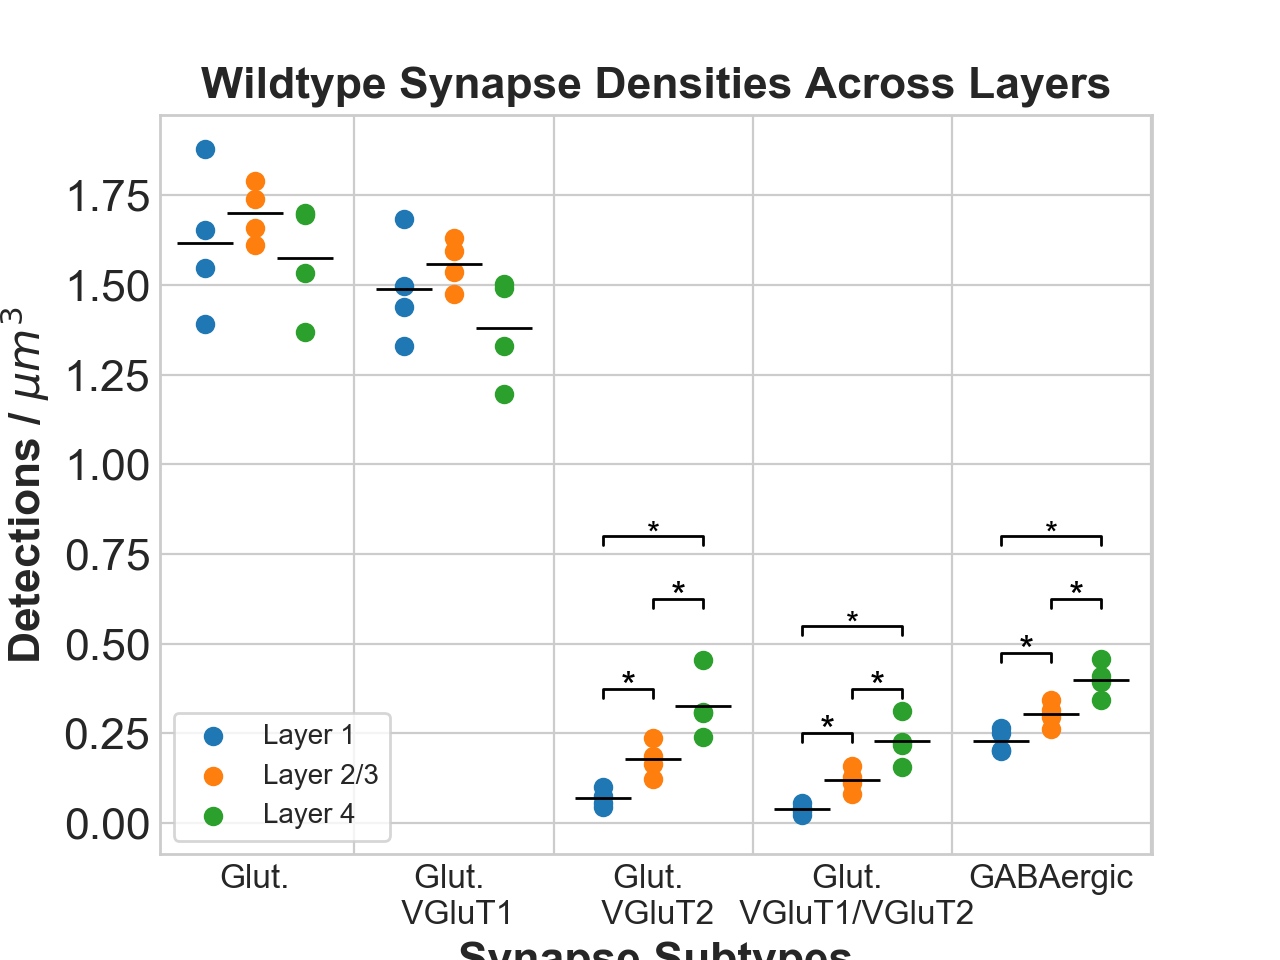

In [30]:
fig = plt.figure()
plt.style.use('seaborn-whitegrid')
size_key = '1' 
x = 0
x_label_locs = [] 


for query_key in query_keys: 
    layer_key = 'average_L1'
    layer_data_key = layer_key + '_data'
    wt_mean = avg_layer_wt_mouse[query_key][layer_key][size_key]
    wt_data_L1 = avg_layer_wt_mouse[query_key][layer_data_key][size_key]
    xlist = np.ones((4, 1))*x
    plt.plot(x, wt_mean, markersize=20, marker = "_", color='black', label='wildtype')
    p0 = plt.scatter(xlist, wt_data_L1, color='C0', label='wildtype')
    
    
    layer_key = 'average_L23'
    layer_data_key = layer_key + '_data'
    wt_mean = avg_layer_wt_mouse[query_key][layer_key][size_key]
    wt_data_L23 = avg_layer_wt_mouse[query_key][layer_data_key][size_key]
    x = x + 1
    xlist = np.ones((4, 1))*x
    plt.plot(x, wt_mean, markersize=20, marker = "_", color='black', label='wildtype')
    p1 = plt.scatter(xlist, wt_data_L23, color='C1', label='wildtype')

    
    layer_key = 'average_L4'
    layer_data_key = layer_key + '_data'
    wt_mean = avg_layer_wt_mouse[query_key][layer_key][size_key]
    wt_data_L4 = avg_layer_wt_mouse[query_key][layer_data_key][size_key]
    x = x + 1
    xlist = np.ones((4, 1))*x
    plt.plot(x, wt_mean, markersize=20, marker = "_", color='black', label='wildtype')
    p2 = plt.scatter(xlist, wt_data_L4, color='C2', label='wildtype')
    
    x_label_locs.append(x+1)

    
    # Plot all three statistical pairs 
    h = 0.025
    textsize = 14
    # Layer 1 vs Layer 2/3
    pval = scipy.stats.ttest_ind(wt_data_L1, wt_data_L23)
    pval = pval.pvalue
    if pval < 0.05:
        y = max(max([wt_data_L1, wt_data_L23]))
        [y, yticks] = fxsdata.get_yticks(y)
        textstr = '*'
        plt.plot([x-2, x-2, x-1, x-1], [y, y+h, y+h, y], lw=1, c='black')
        plt.text(x-1.5, y+h, textstr, color=colorstr, fontsize=textsize, rotation=0,
                         verticalalignment='center', horizontalalignment='center')
    
    # Layer 2/3 vs Layer 4 
    pval = scipy.stats.ttest_ind(wt_data_L23, wt_data_L4)
    pval = pval.pvalue    
    if pval < 0.05:
        y = max(max([wt_data_L23, wt_data_L4]))
        [y, yticks] = fxsdata.get_yticks(y)
        y = y - 0.15
        textstr = '*'
        y = y + 2*h 
        plt.text(x-0.5, y+h, textstr, color=colorstr, fontsize=textsize, rotation=0,
                         verticalalignment='center', horizontalalignment='center')
        plt.plot([x-1, x-1, x, x], [y, y+h, y+h, y], lw=1, c='black')

    # Layer 1 vs Layer 4
    pval = scipy.stats.ttest_ind(wt_data_L1, wt_data_L4)
    pval = pval.pvalue
    if pval < 0.05:
        y = max(max([wt_data_L1, wt_data_L4]))
        [y, yticks] = fxsdata.get_yticks(y)
        textstr = '*'
        textsize = 12
        vastr = 'center'
        y = y + 3*h
        plt.text(x-1, y+h, textstr, color=colorstr, fontsize=textsize, rotation=0,
                         verticalalignment=vastr, horizontalalignment='center')
        plt.plot([x-2, x-2, x, x], [y, y+h, y+h, y], lw=1, c='black') 
    
    x = x + 2

    
    
    
ax = plt.gca()

plt.title('Wildtype Synapse Densities Across Layers', fontsize=16, fontweight='bold')
plt.ylabel('Detections / $\mu m^3$', fontsize=16, fontweight='bold')
plt.xlabel('Synapse Subtypes', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)
plt.xticks(x_label_locs, xlabels, fontsize=12) 
plt.legend([p0, p1, p2], ['Layer 1', 'Layer 2/3', 'Layer 4'], frameon=True, loc='lower left')
# plt.yticks(yticks)

dx = -36/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

plt.savefig('figs/wildtype-figs/synapse_density.png',
            dpi=300, bbox_inches='tight')
